First, change directory to "/scraping/scrapeStats".
Do : "scrapy crawl proBStats -O dataset_proBstats.json"
Do : "scrapy crawl playersInformation -O dataset_proBPlayers.json"
Do : "python script_clean_duplicate_players.py"

Transform these in a global dataset.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_json('scraping/dataset_proBstats.json')
df2 = pd.read_json('scraping/dataset_proBPlayers.json')

merged_df = pd.merge(df1, df2, on='playerId')

merged_df.to_json('full_dataset.json', orient='records')

In [2]:
df_final = pd.read_json('full_dataset.json')
df_final.head()

,playerPicture,playerName,playerId,teamPicture,teamName,gamesPlayed,gamesWhereStarted,totalMinutes,totalPoints,totalFieldGoalAttempted,...,totalBlockSudden,totalSteal,totalTurnovers,totalFoulsMade,totalFoulsSudden,+/-,totalEvaluation,playerAge,height (cm),playerRole
0,https://assets.altrstat.xyz/images/Basketball/...,Sofiane Briki,1046,https://assets.altrstat.xyz/images/Basketball/...,Gries-Souffel,20,17,499,164,40,...,3,17,47,49,35,-76,146,23,193,Meneur/Arrière
1,https://assets.altrstat.xyz/images/Basketball/...,Charles-Henri Bronchard,1060,https://assets.altrstat.xyz/images/Basketball/...,Vichy-Clermont,20,0,318,108,54,...,10,4,14,23,33,3,100,40,200,Ailier fort
2,https://assets.altrstat.xyz/images/Basketball/...,Léopold Ca,1200,https://assets.altrstat.xyz/images/Basketball/...,Gries-Souffel,20,9,350,100,51,...,2,13,21,45,15,25,167,24,208,Ailier fort
3,https://assets.altrstat.xyz/images/Basketball/...,Ousmane Camara,1239,https://assets.altrstat.xyz/images/Basketball/...,Evreux,19,15,367,91,76,...,4,8,28,45,20,-51,155,33,205,Intérieur
4,https://assets.altrstat.xyz/images/Basketball/...,Corentin Carne,1284,https://assets.altrstat.xyz/images/Basketball/...,Aix-Maurienne,16,4,302,54,20,...,1,10,17,32,18,-50,43,26,195,Arrière


In [3]:
df_final = df_final[df_final.gamesPlayed > 0]

df_final["minutes_per_match"] = df_final["totalMinutes"] / df_final["gamesPlayed"]

df_final["points_per_30min"] = df_final["totalPoints"] / df_final["totalMinutes"] * 30
df_final.drop("totalPoints", axis = 1, inplace=True)

df_final["fieldGoalAttempted_per_30min"] = df_final["totalFieldGoalAttempted"] / df_final["totalMinutes"] * 30
df_final.drop("totalFieldGoalAttempted", axis = 1, inplace=True)

df_final["fieldGoalAttempted_per_30min"] = df_final["totalFieldGoal"] / df_final["totalMinutes"] * 30
df_final.drop("totalFieldGoal", axis = 1, inplace=True)

df_final["threePointAttempted_per_30min"] = df_final["totalThreePointAttempted"] / df_final["totalMinutes"] * 30
df_final.drop("totalThreePointAttempted", axis = 1, inplace=True)

df_final["threePoint_per_30min"] = df_final["totalThreePoint"] / df_final["totalMinutes"] * 30
df_final.drop("totalThreePoint", axis = 1, inplace=True)

df_final["freeThrowsAttempted_per_30min"] = df_final["totalFreeThrowsAttempted"] / df_final["totalMinutes"] * 30
df_final.drop("totalFreeThrowsAttempted", axis = 1, inplace=True)

df_final["freeThrows_per_30min"] = df_final["totalFreeThrows"] / df_final["totalMinutes"] * 30
df_final.drop("totalFreeThrows", axis = 1, inplace=True)

df_final["offensiveRebounds_per_30min"] = df_final["totalOffensiveRebounds"] / df_final["totalMinutes"] * 30
df_final.drop("totalOffensiveRebounds", axis = 1, inplace=True)

df_final["defensiveRebounds_per_30min"] = df_final["totalDefensiveRebounds"] / df_final["totalMinutes"] * 30
df_final.drop("totalDefensiveRebounds", axis = 1, inplace=True)

df_final["rebounds_per_30min"] = df_final["offensiveRebounds_per_30min"] + df_final["defensiveRebounds_per_30min"]
df_final.drop("totalRebounds", axis = 1, inplace=True)

df_final["assists_per_30min"] = df_final["totalAssists"] / df_final["totalMinutes"] * 30
df_final.drop("totalAssists", axis = 1, inplace=True)

df_final["blockMade_per_30min"] = df_final["totalBlockMade"] / df_final["totalMinutes"] * 30
df_final.drop("totalBlockMade", axis = 1, inplace=True)

df_final["blockSudden_per_30min"] = df_final["totalBlockSudden"] / df_final["totalMinutes"] * 30
df_final.drop("totalBlockSudden", axis = 1, inplace=True)

df_final["steal_per_30min"] = df_final["totalSteal"] / df_final["totalMinutes"] * 30
df_final.drop("totalSteal", axis = 1, inplace=True)

df_final["turnovers_per_30min"] = df_final["totalTurnovers"] / df_final["totalMinutes"] * 30
df_final.drop("totalTurnovers", axis = 1, inplace=True)

df_final["foulsMade_per_30min"] = df_final["totalFoulsMade"] / df_final["totalMinutes"] * 30
df_final.drop("totalFoulsMade", axis = 1, inplace=True)

df_final["foulsSudden_per_30min"] = df_final["totalFoulsSudden"] / df_final["totalMinutes"] * 30
df_final.drop("totalFoulsSudden", axis = 1, inplace=True)

df_final["+/-_per_30min"] = df_final["+/-"] / df_final["totalMinutes"] * 30
df_final.drop("+/-", axis = 1, inplace=True)

df_final["evaluation_per_30min"] = df_final["totalEvaluation"] / df_final["totalMinutes"] * 30
df_final.drop("totalEvaluation", axis = 1, inplace=True)

/var/folders/r8/zqmq4mj91p1f_0yg_2vxkx_80000gn/T/ipykernel_29428/4163413773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C_mat = df_final.corr()


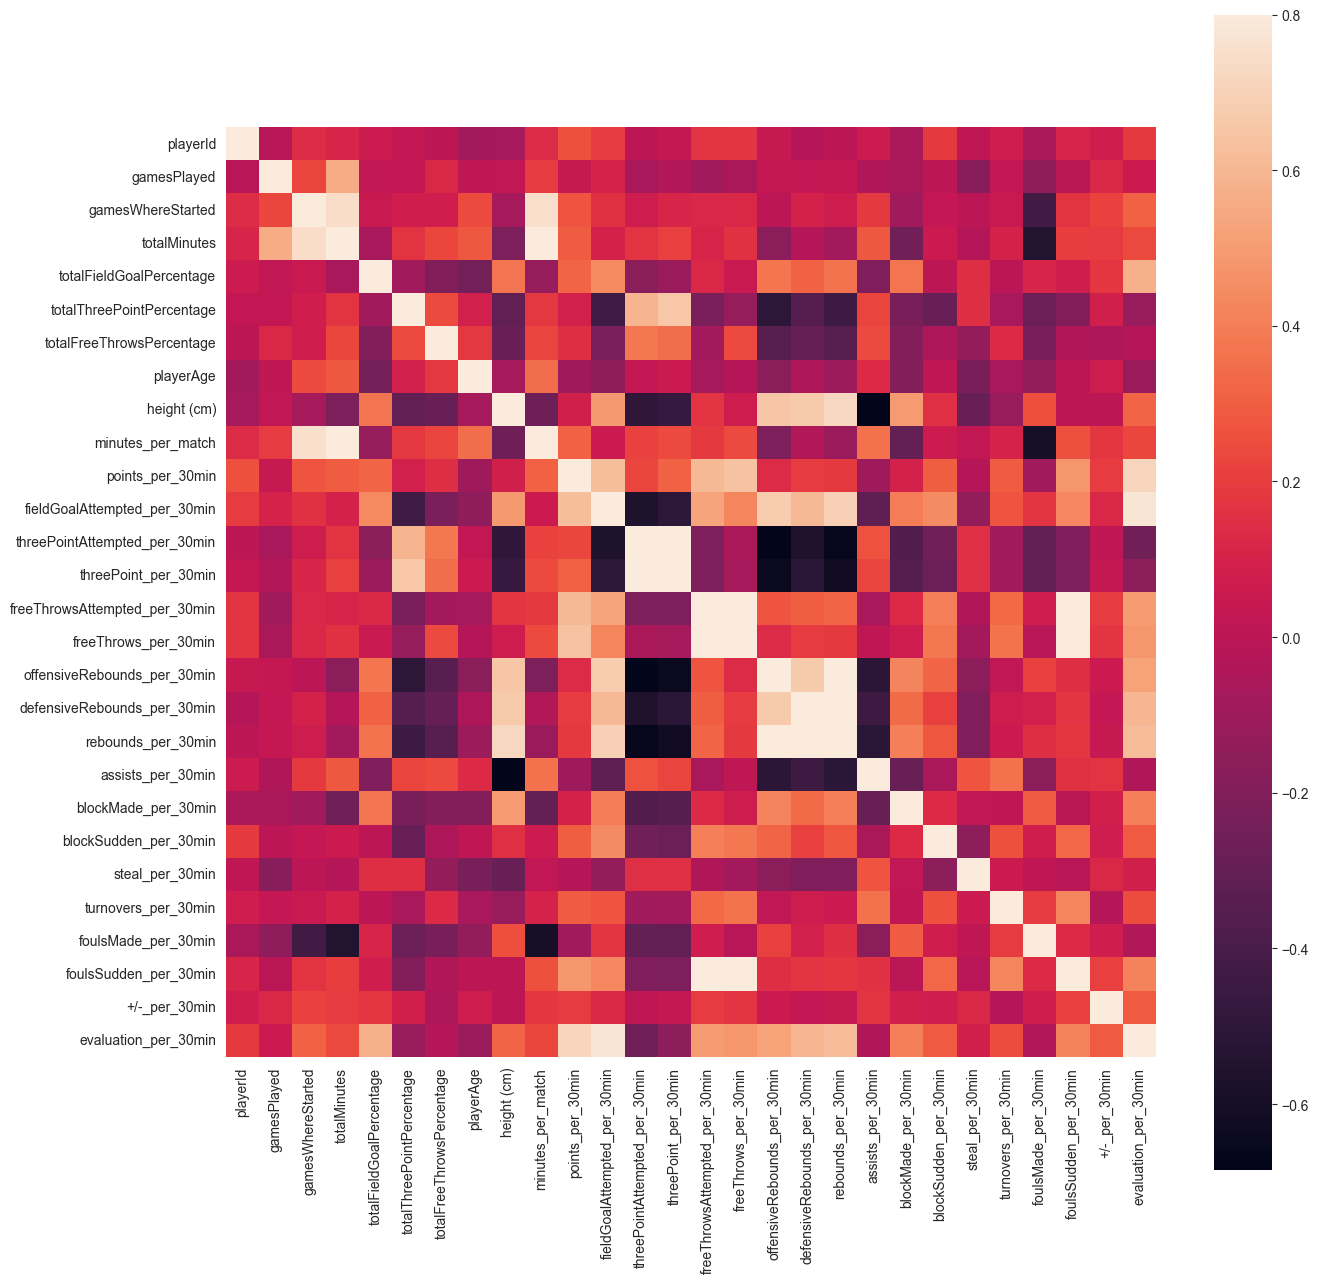

In [4]:
C_mat = df_final.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

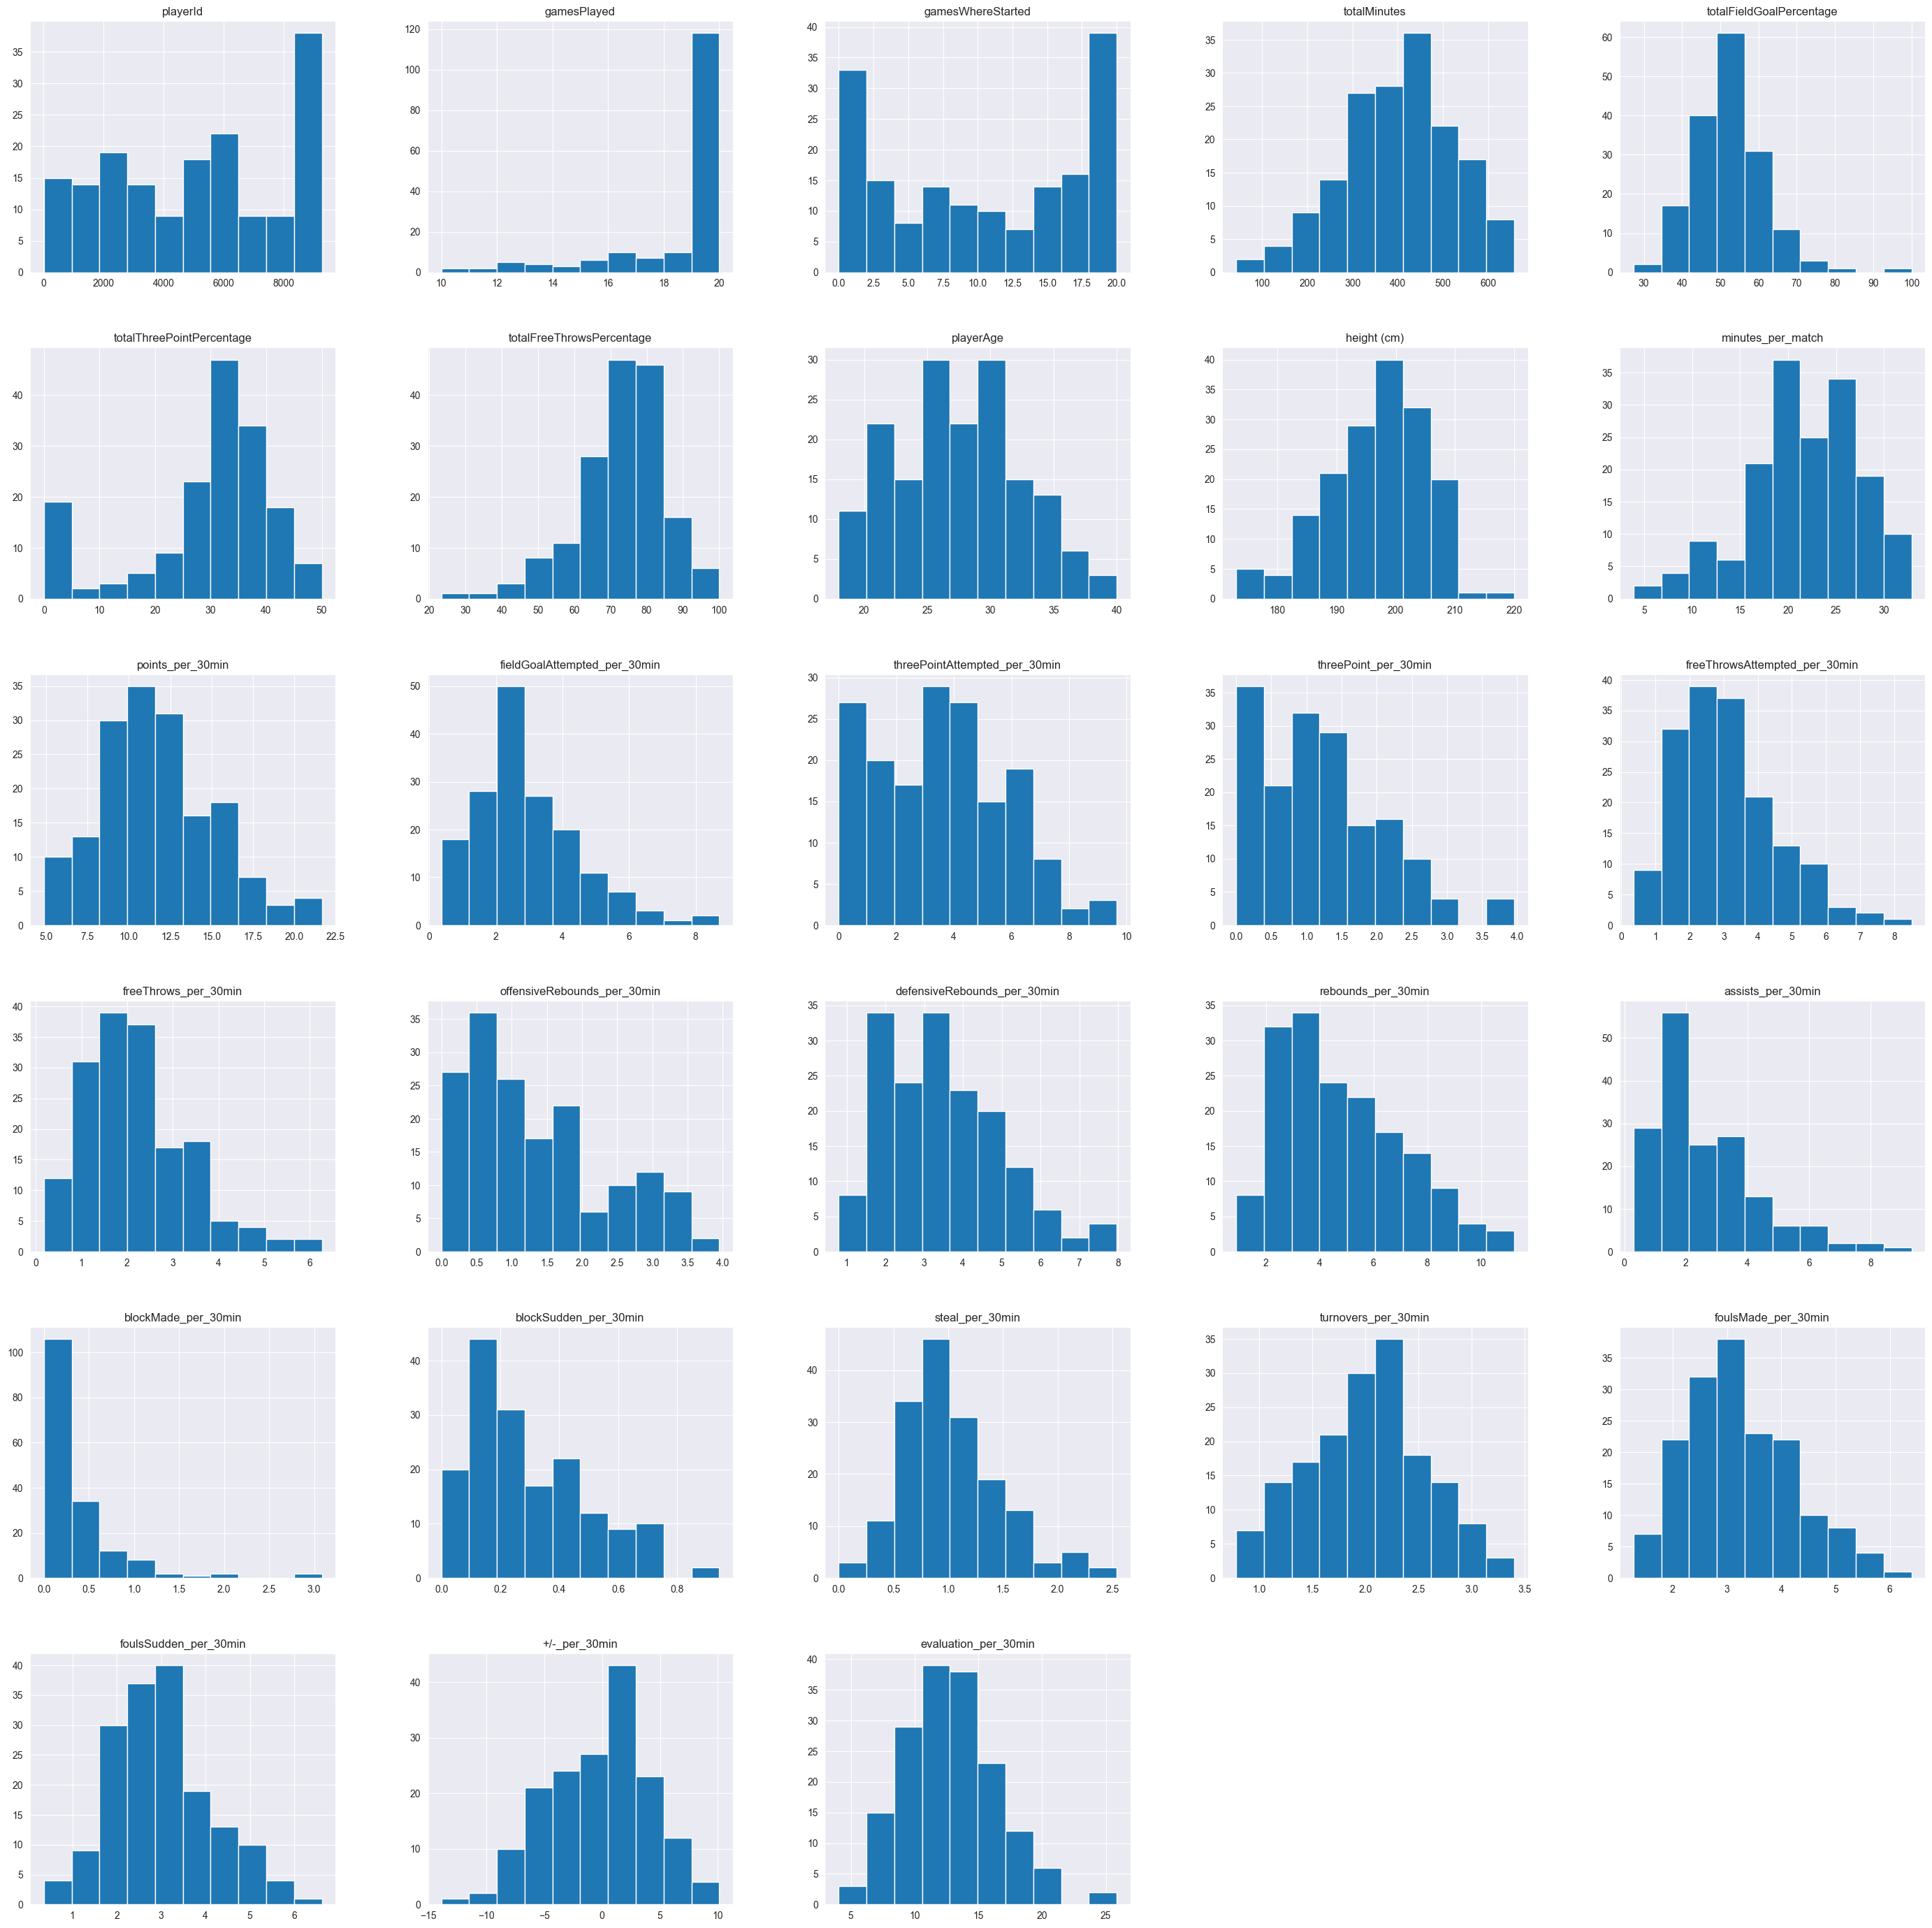

In [5]:
df_final.hist(figsize = (35,35))
plt.show()

In [6]:
df_final = df_final.sort_values('points_per_30min', ascending=False)
df_final

,playerPicture,playerName,playerId,teamPicture,teamName,gamesPlayed,gamesWhereStarted,totalMinutes,totalFieldGoalPercentage,totalThreePointPercentage,...,rebounds_per_30min,assists_per_30min,blockMade_per_30min,blockSudden_per_30min,steal_per_30min,turnovers_per_30min,foulsMade_per_30min,foulsSudden_per_30min,+/-_per_30min,evaluation_per_30min
179,https://assets.altrstat.xyz/images/Basketball/...,Tray Boyd,9015,https://assets.altrstat.xyz/images/Basketball/...,Vichy-Clermont,20,20,645,47.7,34.8,...,2.883721,4.186047,0.139535,0.465116,1.395349,3.023256,1.953488,5.255814,3.488372,16.651163
85,https://assets.altrstat.xyz/images/Basketball/...,Nic Moore,5479,https://assets.altrstat.xyz/images/Basketball/...,Boulazac,13,13,349,50.8,43.0,...,2.320917,5.759312,0.000000,0.257880,1.289398,2.578797,3.266476,3.782235,4.297994,19.340974
130,https://assets.altrstat.xyz/images/Basketball/...,Bastien Vautier,7813,https://assets.altrstat.xyz/images/Basketball/...,Lille,20,20,509,67.8,50.0,...,9.960707,1.591356,0.825147,0.471513,0.884086,2.946955,4.066798,4.538310,6.129666,25.697446
146,https://assets.altrstat.xyz/images/Basketball/...,Mathieu Boyer,8383,https://assets.altrstat.xyz/images/Basketball/...,Saint-Chamond,19,16,455,65.7,0.0,...,10.549451,1.978022,0.197802,0.395604,0.725275,1.582418,4.021978,4.417582,2.637363,25.846154
70,https://assets.altrstat.xyz/images/Basketball/...,Johan Lofberg,4715,https://assets.altrstat.xyz/images/Basketball/...,Denain,20,10,465,53.9,37.7,...,3.870968,2.903226,0.322581,0.387097,1.225806,2.580645,3.483871,3.548387,1.548387,16.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,https://assets.altrstat.xyz/images/Basketball/...,Matthieu Robin,6636,https://assets.altrstat.xyz/images/Basketball/...,La Rochelle,20,1,337,40.6,18.8,...,4.362018,2.581602,0.089021,0.267062,0.979228,2.225519,3.293769,3.738872,-2.759644,7.922849
178,https://assets.altrstat.xyz/images/Basketball/...,Nadyr Labouize,9010,https://assets.altrstat.xyz/images/Basketball/...,Saint-Vallier,19,1,268,47.1,40.0,...,3.134328,4.029851,0.111940,0.000000,1.231343,2.238806,2.798507,2.238806,-6.268657,8.731343
27,https://assets.altrstat.xyz/images/Basketball/...,Paul-Lou Duwiquet,2429,https://assets.altrstat.xyz/images/Basketball/...,Quimper,19,1,378,45.5,31.3,...,2.380952,2.063492,0.000000,0.158730,1.269841,1.507937,2.936508,0.952381,-4.285714,6.349206
4,https://assets.altrstat.xyz/images/Basketball/...,Corentin Carne,1284,https://assets.altrstat.xyz/images/Basketball/...,Aix-Maurienne,16,4,302,45.0,20.0,...,0.894040,3.377483,0.000000,0.099338,0.993377,1.688742,3.178808,1.788079,-4.966887,4.271523


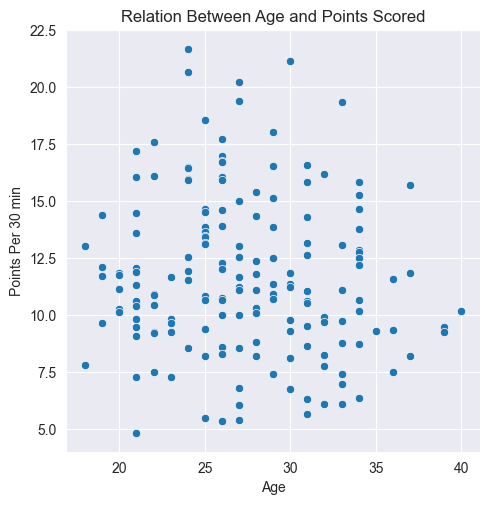

In [7]:
sns.relplot(x="playerAge", y="points_per_30min", data=df_final, kind="scatter")
plt.xlabel("Age")
plt.ylabel("Points Per 30 min")
plt.title("Relation Between Age and Points Scored");

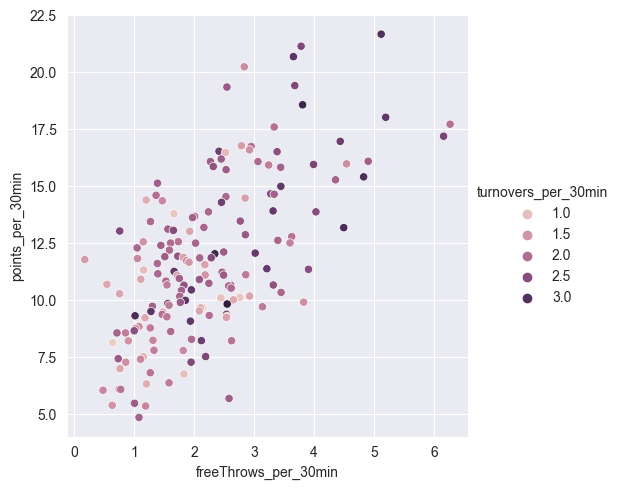

In [8]:
sns.relplot(x="freeThrows_per_30min", y="points_per_30min", data=df_final, kind="scatter", hue="turnovers_per_30min");